In [34]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [35]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [36]:
import requests
from io import BytesIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch data from URL
response = requests.get(URL)

# Load data into a DataFrame
df = pd.read_csv(BytesIO(response.content))

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [37]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [38]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

TASK 1.1

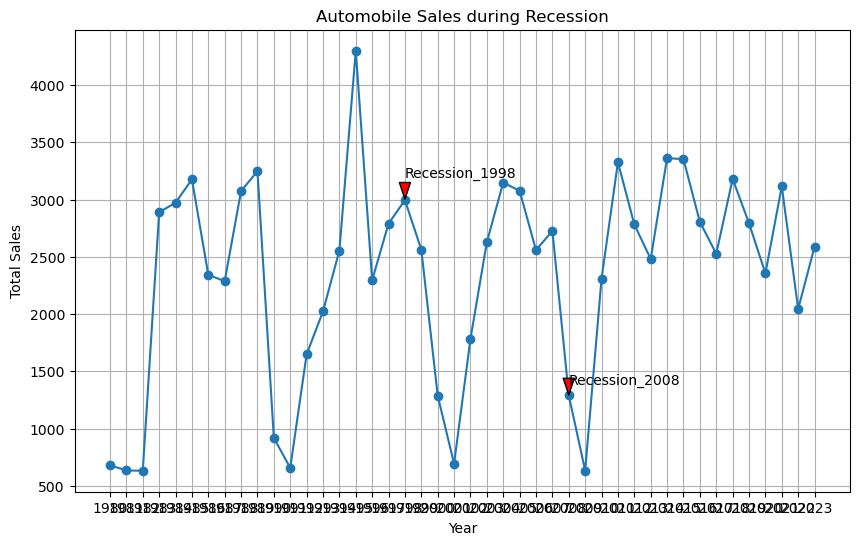

In [32]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

df['Year'] = df['Year'].dt.year

yearly_sales = df.groupby('Year')['Automobile_Sales'].mean()

ax = yearly_sales.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

ax.set_xticks(yearly_sales.index)

ax.annotate('Recession_2008', xy=(2008, yearly_sales.loc[2008]), xytext=(2008, yearly_sales.loc[2008]+100),
            arrowprops=dict(facecolor='red', shrink=0.05, width=0.5, headwidth=8))
ax.annotate('Recession_1998', xy=(1998, yearly_sales.loc[1998]), xytext=(1998, yearly_sales.loc[1998]+200),
            arrowprops=dict(facecolor='red', shrink=0.05, width=0.5, headwidth=8))


plt.show()

TASK 1.2

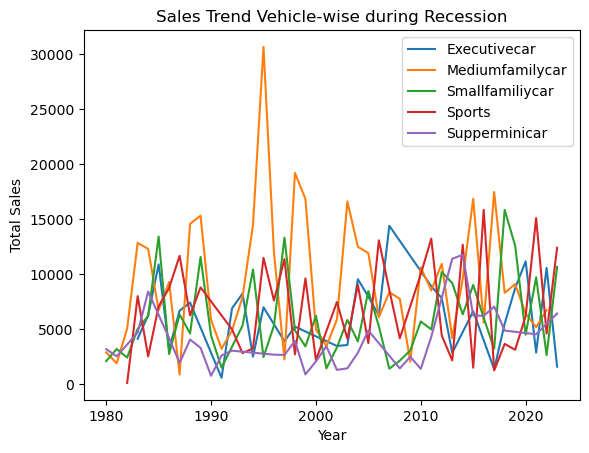

In [52]:
df_Mline = df.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()
plt.show()

From the above plot, what insights have you gained on the sales of various vehicle types?
Type in your answer below: 

Medium Family car has high sales rate

TASK 1.3

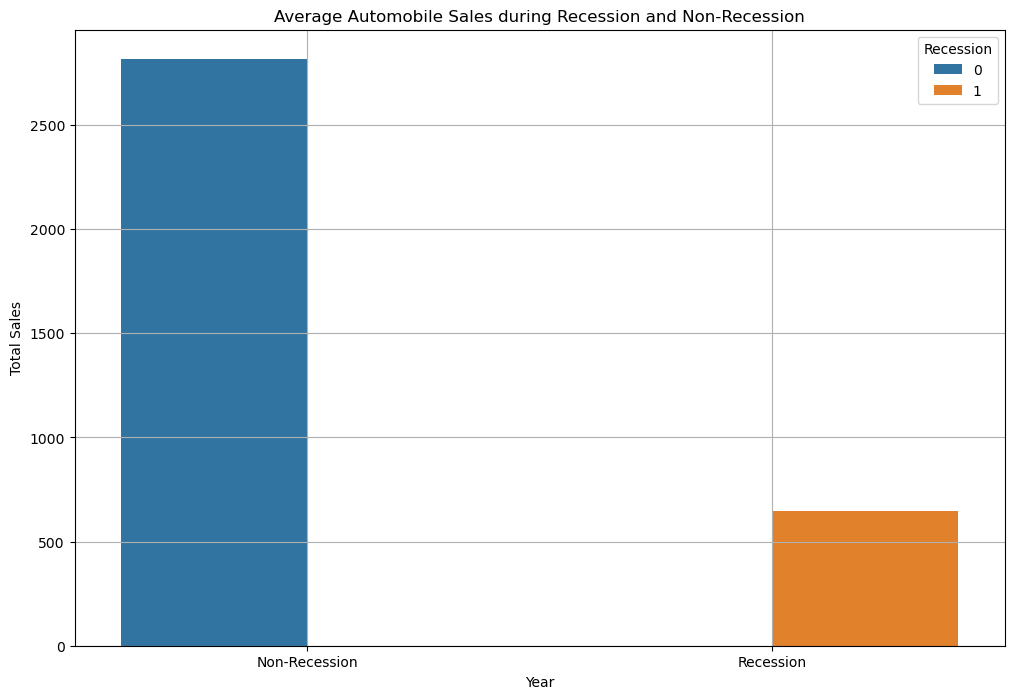

In [58]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=new_df, x='Recession', y='Automobile_Sales', hue='Recession')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

From the above chart what insights have you gained on the overall sales of automobiles during recession?
Type your answer below:-

During recession, the sales of automobiles significantly reduced

TASK 1.4

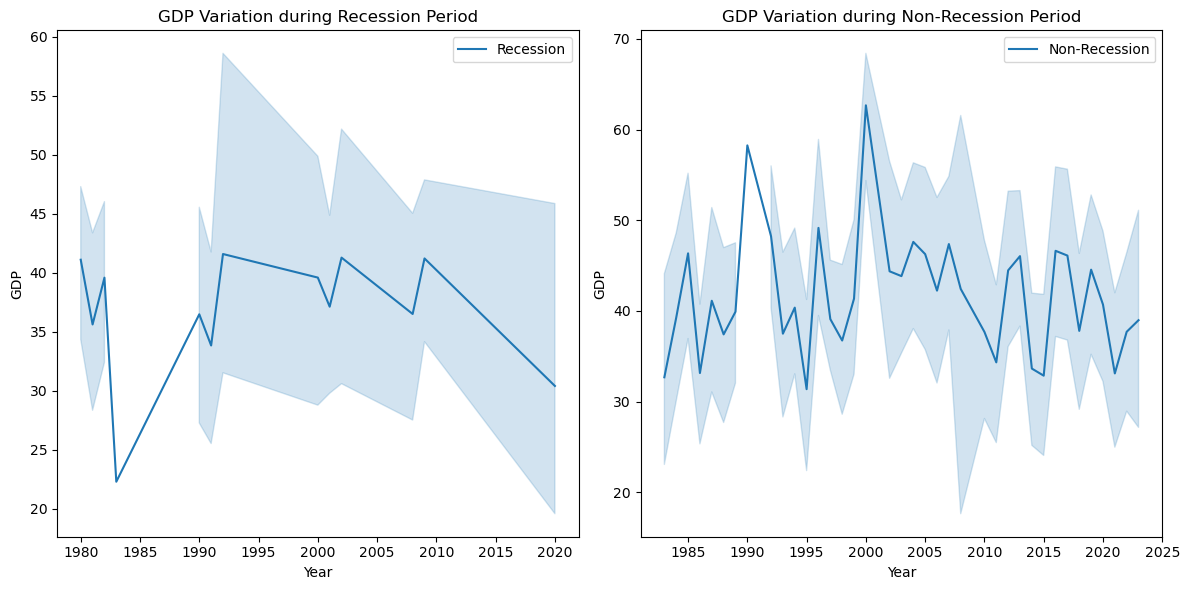

In [59]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

fig=plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

TASK 1.5

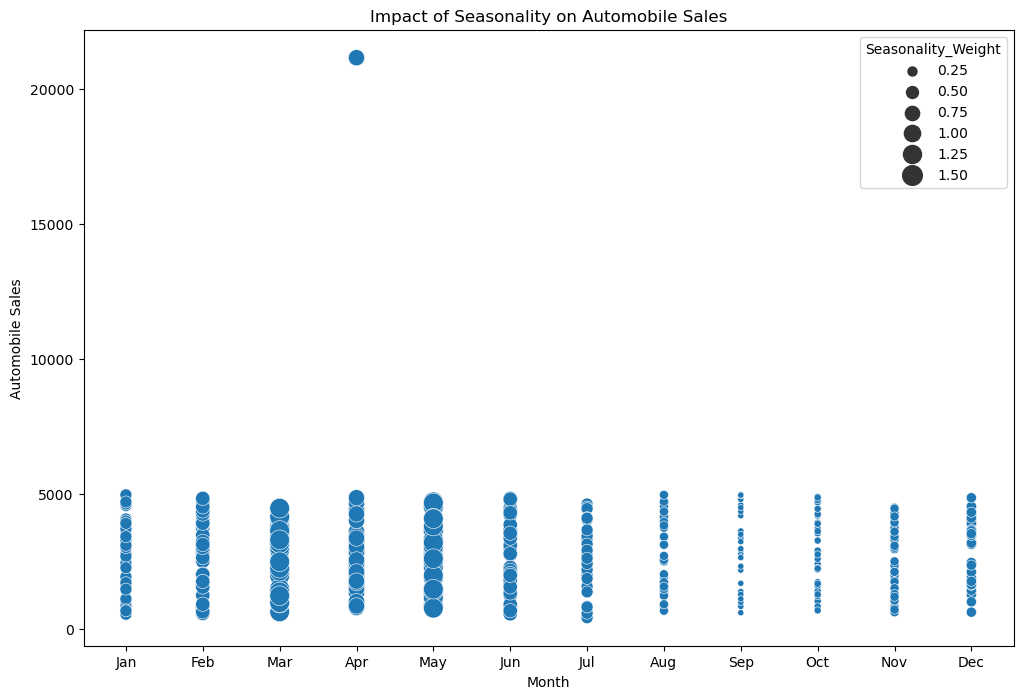

In [78]:
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight']
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Month', y='Automobile_Sales', size=size, sizes=(20, 200))
plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.show()

TASK 1.6

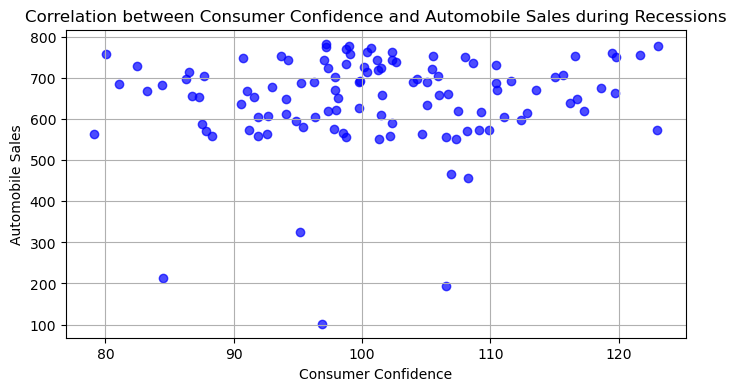

In [80]:
rec_data = df[df['Recession'] == 1]

plt.figure(figsize=(8, 4))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], color='blue', alpha=0.7)
plt.title('Correlation between Consumer Confidence and Automobile Sales during Recessions')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.grid(True)

plt.show()

How does the average vehicle price relate to the sales volume during recessions?


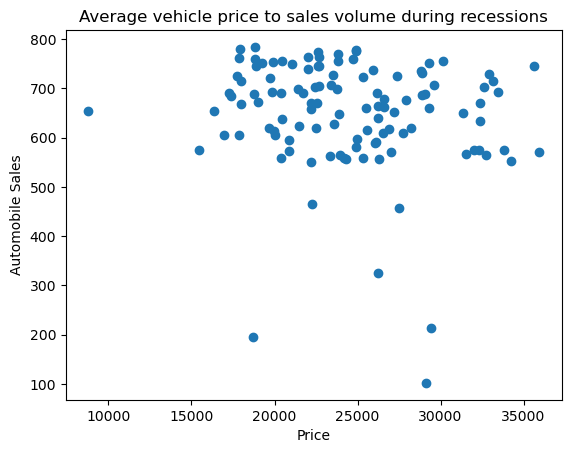

In [83]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
    
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Average vehicle price to sales volume during recessions')
plt.show()

TASK 1.7

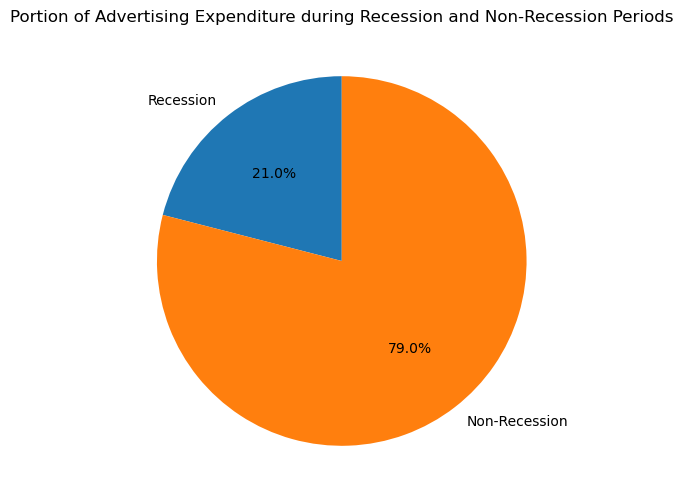

In [84]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Portion of Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?
Type your answer below:-

During recession, business does not spend more on advertising 

TASK 1.8

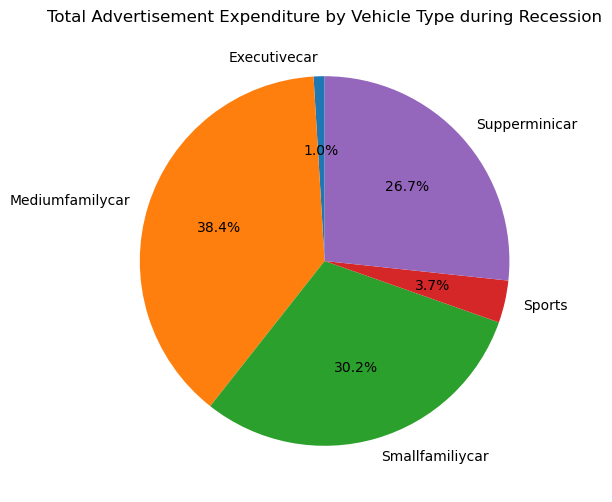

In [86]:
Rdata = df[df['Recession'] == 1]

VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertisement Expenditure by Vehicle Type during Recession')

plt.show()

TASK 1.9

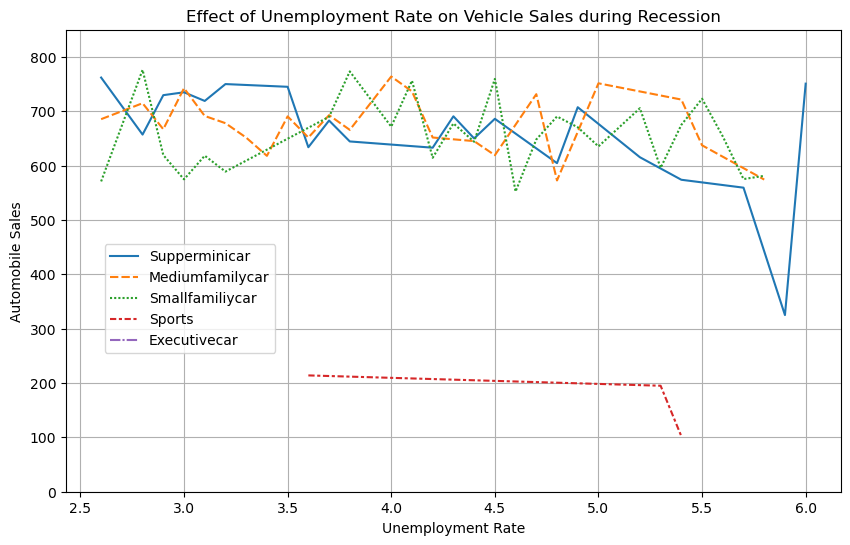

In [93]:
df_rec = df[df['Recession'] == 1]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers=False, err_style=None)
plt.title('Effect of Unemployment Rate on Vehicle Sales during Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.ylim(0, 850) 
plt.legend(loc=(0.05, 0.3))  
plt.grid(True)

plt.show()